<a href="https://colab.research.google.com/github/AHartNtkn/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module3-introduction-to-bayesian-inference/LS_DS7_133_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 133

## Introduction to Bayesian Inference




## Assignment - Code it up!

Most of the above was pure math - now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up, and as a stretch goal - refactor your code into helpful reusable functions!

Specific goals/targets:

1. Write a function `def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk)` that reproduces the example from lecture, and use it to calculate and visualize a range of situations
2. Explore `scipy.stats.bayes_mvs` - read its documentation, and experiment with it on data you've tested in other ways earlier this week
3. Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach
4. In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/) - you could and should create something similar!

Stretch goals:

- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!

In [0]:
def bayes(prior, true_pos, false_pos, num_iter):
  '''
  Given a properties of a statistical test, gives how the probabilities change with subsiquent positive runs.
  ''' 
  probabilities = []
  newPrior = prior

  for _ in range(num_iter):
    newPrior = (true_pos * newPrior) / (true_pos * newPrior + false_pos * (1 - newPrior))
    probabilities.append(newPrior)
  
  return probabilities

In [92]:
bayes(.005, .99, .01, 5)

[0.33221476510067116,
 0.9801000000000001,
 0.9997949506335922,
 0.9999979283737839,
 0.9999999790744397]

Here's a recursive implementation, which I think is more intuitive. Though, it technically doesn't work properly due to Pythons impurities. I could fix it at the expense of dirtying the code, but it's good enough for demonstration purposes.

In [0]:
def bayes_rec(prior, true_pos, false_pos, num_iter, probabilities=[]):
  '''
  Given a properties of a statistical test, gives how the probabilities change with subsiquent runs.
  '''  
  newPrior = (true_pos * prior) / (true_pos * prior + false_pos * (1 - prior))

  if num_iter > 1:
    bayes_rec(newPrior, true_pos, false_pos, num_iter-1, probabilities)
  probabilities.insert(0, newPrior)
  return probabilities

In [97]:
bayes_rec(.005, .99, .01, 5)

[0.33221476510067116,
 0.9801000000000001,
 0.9997949506335922,
 0.9999979283737839,
 0.9999999790744397]

Now I need to pick a dataset from this week.

In [98]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2019-08-21 18:34:33--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.03s   

2019-08-21 18:34:33 (597 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [101]:
import pandas as pd
import numpy as np

df = pd.read_csv('house-votes-84.data',names=['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa'])

#clean up the values
for c in df.columns:
  if c != 'party':
    df[c] = df[c].apply(lambda x: 0 if x == 'n' else (1 if x == 'y' else np.NaN))

df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


My code from yesterday

In [0]:
import scipy.stats as stats

def confidence_interval_1samp_size(idata, confidence=.95):
  data = np.array(idata)
 
  n = len(data)

  # To get the intervals, I must first get the standard error and t-score, then muliply them.
  # This t-score is simply the 95% t-score with df = n1 + n2 - 2, since we have two samples
  t_score = stats.t.ppf((1 + confidence) / 2.0, n - 1)

  standard_error = stats.sem(data)

  # Here's our numerical representation of our interval.
  return t_score * standard_error

def confidence_interval_1samp(data, confidence=.95):
  interval = confidence_interval_1samp_size(data, confidence)

  # Our interval mean will simply be the difference in means of our two samples;
  mean = data.mean()

  # Here's our full interval.
  return (mean, mean - interval, mean + interval)

In [112]:
confidence_interval_1samp(df[df['party']=='democrat'].dropna()['education'])

(0.12903225806451613, 0.06919940918552969, 0.18886510694350256)

The baysian result

In [114]:
stats.bayes_mvs(df[df['party']=='democrat'].dropna()['education'], alpha=.95)[0]

Mean(statistic=0.12903225806451613, minmax=(0.0691994091855297, 0.18886510694350256))

Hmm, it's the same result.

In [119]:
# Create a function that used bayes returning the same format as my function
def confidence_interval_1samp_bayes(idata, confidence=.95):
  res = stats.bayes_mvs(idata, alpha=confidence)[0]
  return (res.statistic, res.minmax[0], res.minmax[1])

confidence_interval_1samp_bayes(df[df['party']=='democrat'].dropna()['education'])

(0.12903225806451613, 0.0691994091855297, 0.18886510694350256)

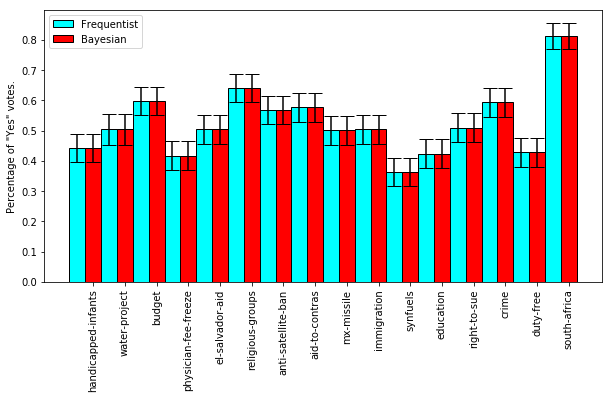

In [131]:
import matplotlib.pyplot as plt

barWidth = .5

# df without the party column
dfnums = df.drop('party', axis=1)

# 1 bar for each column
bars1 = [ dfnums[c].mean() for c in dfnums.columns ]
bars2 = [ dfnums[c].mean() for c in dfnums.columns ]

# Bar intervals based on confidence interval
yer1 = [ confidence_interval_1samp_size(dfnums[c].dropna()) for c in dfnums.columns ]
yer2 = [ confidence_interval_1samp_bayes(dfnums[c].dropna()) for c in dfnums.columns ]
 
# The x position of bars
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

# Make figure bigger
plt.figure(figsize=(10,5))

plt.bar(r1, bars1, width = barWidth, color = 'cyan', edgecolor = 'black', yerr=yer1, capsize=7, label='Frequentist')
plt.bar(r2, bars2, width = barWidth, color = 'red', edgecolor = 'black', yerr=yer1, capsize=7, label='Bayesian')
 
plt.xticks([r + barWidth for r in range(len(bars1))], dfnums.columns, rotation=90)
plt.ylabel('Percentage of "Yes" votes.')

plt.legend()

plt.show()

They're the same.

The difference between the Bayesian and Frequentist approaches to statistics is mostly philosophical. A Frequentist imagines counting hypothetical proportions of a population while a Bayesian imagines degrees of belief over certain results. This causes some differences in methodology; Bayesian statistics tends to be fixated on how to update beliefs, while Frequentism is more fixated on drawing conclusions from data. This makes Bayesian statistics more compositional while Frequentist statistics tends to be more procedural.

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)